In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle

In [2]:
from keras.preprocessing import image_dataset_from_directory
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [3]:
def read_pickle(directory):
    f = open(directory,"rb")
    X = pickle.load(f)
    return np.array(X)

In [4]:
X_train = read_pickle('X_Train.pickle')/255.0
y_train = read_pickle('y_Train.pickle')
X_val = read_pickle('X_val.pickle')/255.0
y_val = read_pickle("y_val.pickle")

In [5]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], X_train.shape[2], -1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1], X_val.shape[2], -1)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras import backend as k

In [7]:
nb_classes = 7

model = Sequential()

model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.35))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

early_Stop = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=1,
    restore_best_weights=True,
)

callbacks = [early_Stop]

In [9]:
history = model.fit(
    X_train, y_train,
    epochs = 40,
    validation_data=(X_val, y_val),
    batch_size = 64,
    callbacks=callbacks
)


Epoch 1/40
451/451 [==============================] - 407s 901ms/step - loss: 2.0745 - accuracy: 0.2153 - val_loss: 1.8516 - val_accuracy: 0.2584
Epoch 2/40
451/451 [==============================] - 405s 898ms/step - loss: 1.9165 - accuracy: 0.2404 - val_loss: 1.7497 - val_accuracy: 0.2935
Epoch 3/40
451/451 [==============================] - 349s 773ms/step - loss: 1.8137 - accuracy: 0.2791 - val_loss: 1.6935 - val_accuracy: 0.3501
Epoch 4/40
451/451 [==============================] - 405s 898ms/step - loss: 1.7433 - accuracy: 0.3257 - val_loss: 1.6727 - val_accuracy: 0.3617
Epoch 5/40
451/451 [==============================] - 437s 969ms/step - loss: 1.6807 - accuracy: 0.3488 - val_loss: 1.7582 - val_accuracy: 0.3599
Epoch 6/40
451/451 [==============================] - 482s 1s/step - loss: 1.6180 - accuracy: 0.3792 - val_loss: 1.5726 - val_accuracy: 0.3981
Epoch 7/40
451/451 [==============================] - 474s 1s/step - loss: 1.5516 - accuracy: 0.4002 - val_loss: 1.7117 - val_a

In [10]:
model.save('face_expression_3.h5')
model.save('face_expression_3.model')

INFO:tensorflow:Assets written to: face_expression_3.model/assets


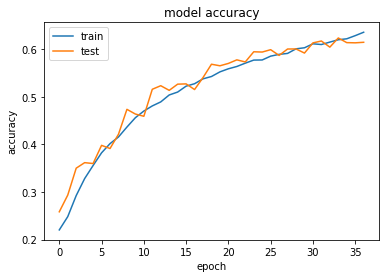

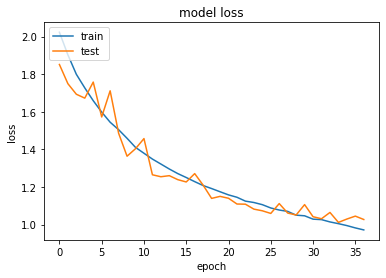

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()